In [1]:
# List of loci
loci = ["BY4741_FKS1-HS1", "BY4741_FKS1-HS2", "BY4741_FKS1-HS3"]

In [2]:
# Parameters
loci = ["BY4741_FKS1-HS1", "BY4741_FKS1-HS2", "BY4741_FKS1-HS3"]


# Notebook to explore homologous hotspot sequences

## Import libraries

In [3]:
import pandas as pd
import logomaker as lm
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["svg.fonttype"] = "none"

## Specify paths and constants

In [4]:
# Input
classified_data = "../classified/"
taxonomy_path = "../../pre/ortholog_data/S3_data.csv"

# Output
graph_outpath = "../graphs/"

# Amino acids
AA_LIST = list("*PGCQNTSEDKHRWYFMLIVA")

# Position offset
pos_offset = {
    'HS1': 639,
    'HS2': 1353,
    'HS3': 690,
}

## Import data

In [5]:
tax_df = pd.read_csv(taxonomy_path).rename(columns={"Hotspot1": "HS1", "Hotspot2": "HS2", "Hotspot3": "HS3"})
longtax = tax_df[tax_df.Kingdom == "Fungi"
                 ].melt(id_vars=["Phylum", "Species", "Is_Human_Pathogen"],
            value_vars=["HS1", "HS2", "HS3"],
            var_name="hotspot", value_name="aa_seq"
            )
sp_per_hs = longtax.groupby(["hotspot", "aa_seq"])[["Phylum", "Species", "Is_Human_Pathogen"]].agg(
    Nb_phyla = ("Phylum", "nunique"),
    Species = ("Species", "unique"),
    At_least_one_human_pathogen = ("Is_Human_Pathogen", "any")
).reset_index()
sp_per_hs

,hotspot,aa_seq,Nb_phyla,Species,At_least_one_human_pathogen
0,HS1,ALALNIKDP,1,[Dactylellina haptotyla],False
1,HS1,ALTLSFRDP,1,"[Oidiodendron maius, Glarea lozoyensis]",False
2,HS1,FLALNIKDP,1,[Arthrobotrys oligospora],False
3,HS1,FLALNLSDS,1,[Schizosaccharomyces octosporus],False
4,HS1,FLALSFKDP,2,"[Phycomyces blakesleeanus, Rhizopus oryzae, Tr...",False
...,...,...,...,...,...
246,HS3,LDTYMWWIIVN,1,[Debaryomyces hansenii],False
247,HS3,LDTYMWYIICN,1,"[Kluyveromyces lactis, Meyerozyma guilliermond...",True
248,HS3,LDTYMWYIILN,1,"[Rutstroemia sp. NJR-2017a BBW, Rutstroemia sp...",False
249,HS3,LDTYMWYILCN,1,"[Komagataella pastoris, Komagataella phaffii]",False


In [6]:
df_list = []

for l in loci:
    df_l = pd.read_csv(f"{classified_data}/{l}/refined_classification_ortho.csv")
    df_list.append(df_l)

df = pd.concat(df_list, ignore_index=True)
df

,strain,paralog,hotspot,locus,compound,Nham_aa,aa_seq,aa_pos,alt_aa,wt_aa,s,lower_err_T2,upper_err_T2,refined_class,sensres
0,BY4741,FKS1,HS1,FKS1-HS1,anidulafungin,0,FLVLSLRDP,not-applicable,not-applicable,not-applicable,-0.071776,0.001547,0.001547,WT-like,sensitive
1,BY4741,FKS1,HS1,FKS1-HS1,anidulafungin,1,FLILSLRDP,641,I,V,-0.159489,0.064357,0.064357,WT-like,sensitive
2,BY4741,FKS1,HS1,FKS1-HS1,anidulafungin,1,FLTLSLRDP,641,T,V,-0.139618,0.130291,0.130291,WT-like,sensitive
3,BY4741,FKS1,HS1,FKS1-HS1,anidulafungin,2,FLALSFRDP,not-applicable,not-applicable,not-applicable,0.201064,0.040796,0.040796,WT-like,sensitive
4,BY4741,FKS1,HS1,FKS1-HS1,anidulafungin,2,FLALSIRDP,not-applicable,not-applicable,not-applicable,-0.195525,0.123053,0.123053,WT-like,sensitive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,BY4741,FKS1,HS3,FKS1-HS3,none,4,LDTYLWYVVWS,not-applicable,not-applicable,not-applicable,-0.029814,0.014908,0.014908,WT-like,sensitive
680,BY4741,FKS1,HS3,FKS1-HS3,none,5,LDTFLFYVLLN,not-applicable,not-applicable,not-applicable,0.007438,0.000364,0.000364,WT-like,sensitive
681,BY4741,FKS1,HS3,FKS1-HS3,none,5,LDTYLFYVLIA,not-applicable,not-applicable,not-applicable,-0.104263,0.090284,0.090284,slightly deleterious,sensitive
682,BY4741,FKS1,HS3,FKS1-HS3,none,7,MDIQIWYAIYS,not-applicable,not-applicable,not-applicable,-0.121119,0.128786,0.128786,slightly deleterious,sensitive


## Merge data

In [7]:
merged = df.merge(right=sp_per_hs, on=["hotspot", "aa_seq"]).copy()
merged["compound"] = merged.compound.str.title()

## Build logos

<>:103: SyntaxWarning: invalid escape sequence '\D'
<>:103: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_28010/561731048.py:103: SyntaxWarning: invalid escape sequence '\D'
  ax.set_ylabel('$\Delta$ Bits')


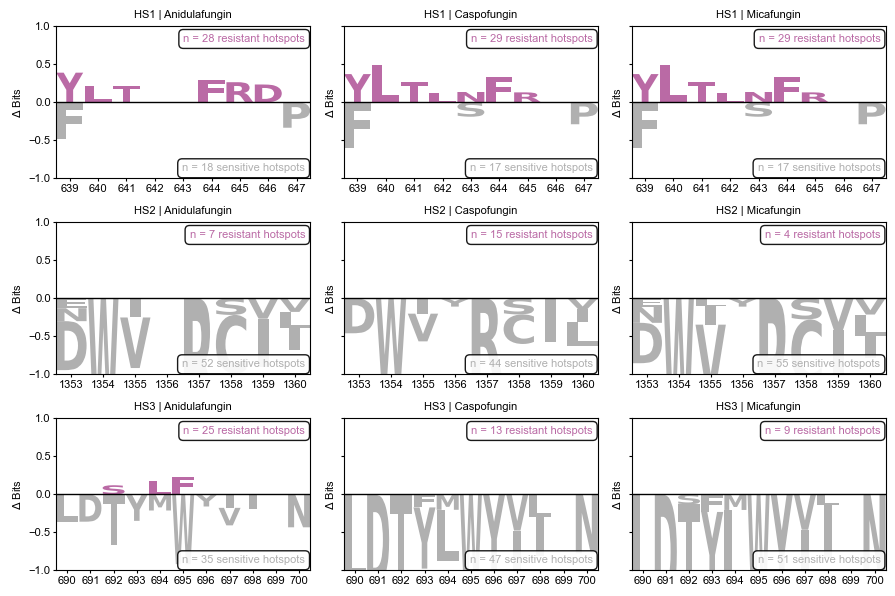

In [8]:
# Unique groups for facets
hotspots = ["HS1","HS2", "HS3"]
compounds = [x for x in merged['compound'].unique() if x!= "None"]

# Set plot theme
custom_rc={
            "font.family": "Arial",
            "font.size": 8,
            "legend.title_fontsize": 8,
            "legend.fontsize": 8,
            "axes.labelsize": 8,
            "axes.titlesize": 8,
            "xtick.labelsize": 8,
            "ytick.labelsize": 8,
            "xtick.major.pad": 2,
            "ytick.major.pad": 2,
            "xtick.bottom": True,
            "ytick.left": True,
            "xtick.major.size": 2,
            "ytick.major.size": 2,
        }

with plt.rc_context(rc=custom_rc):
    # Create the figure grid
    fig, axes = plt.subplots(len(hotspots), len(compounds), 
                            figsize=(3 * len(compounds), 2 * len(hotspots)),
                            sharey=True, 
                            squeeze=False)

    for i, hs in enumerate(hotspots):
        for j, cp in enumerate(compounds):
            ax = axes[i, j]
            
            # Filter for the specific facet
            subset = merged[(merged['hotspot'] == hs) & (merged['compound'] == cp)]
            
            # Get sequences and counts for both conditions
            res_seqs = subset[subset['sensres'] == 'resistant']['aa_seq'].tolist()
            sen_seqs = subset[subset['sensres'] == 'sensitive']['aa_seq'].tolist()
            n_res = len(set(res_seqs))
            n_sen = len(set(sen_seqs))
            
            # Get position offset for specific hotspot
            offset = pos_offset.get(hs, 0)

            # Need data in both groups to compare
            if len(res_seqs) > 0 and len(sen_seqs) > 0:
                # Generate count matrices
                res_info = lm.alignment_to_matrix(res_seqs, to_type="information")
                sen_info = lm.alignment_to_matrix(sen_seqs, to_type="information")
                
                # Reindex
                res_info = res_info.reindex(columns=AA_LIST, fill_value=0)
                sen_info = sen_info.reindex(columns=AA_LIST, fill_value=0)

                # Calculate Difference (Resistant - Sensitive)
                diff_df = res_info - sen_info
                
                # Add position offset
                diff_df.index = diff_df.index + offset
                
                # Remove noise
                diff_df = diff_df.mask(diff_df.abs() < .1, 0)

                # Plot
                logo = lm.Logo(diff_df,
                               flip_below=False,
                               ax=ax)

                # Annotations and other adjustments
                logo.style_xticks(anchor=offset, spacing=1)

                # Custom colors
                for pos, row in diff_df.iterrows():
                    for aa, val in row.items():
                        if val > 0:
                            logo.style_single_glyph(pos, aa, color="#ba6aa5")
                        elif val < 0:
                            logo.style_single_glyph(pos, aa, color="#b0b0b0")

                ax.text(0.98, 0.95, f"n = {n_res} resistant hotspots", 
                        transform=ax.transAxes,
                        verticalalignment='top', 
                        horizontalalignment='right',
                        fontsize=8,
                        color="#ba6aa5",
                        bbox=dict(
                            facecolor="white", alpha=0.9, edgecolor="black", boxstyle="round,pad=.4"
                        )
                )
                ax.text(0.98, 0.1, f"n = {n_sen} sensitive hotspots", 
                        transform=ax.transAxes,
                        verticalalignment='top', 
                        horizontalalignment='right',
                        fontsize=8,
                        color="#b0b0b0",
                        bbox=dict(
                            facecolor="white", alpha=0.9, edgecolor="black", boxstyle="round,pad=.4"
                        )
                )
                ax.set_title(f"{hs} | {cp}")
                ax.axhline(0, color='black', linewidth=1) # Baseline
                ax.set_ylabel('$\Delta$ Bits')
                ax.set_ylim(-1,1)
            else:
                ax.text(0.5, 0.5, 'Insufficient Data', ha='center')

    plt.tight_layout()
    plt.savefig(f"{graph_outpath}/logos.svg", format="svg", dpi=300)
    plt.savefig(f"{graph_outpath}/logos.png", format="png", dpi=300)